In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 

In [2]:
df = pd.read_csv(r"D:\ALL Projects\1ML\Car_price_prediction\car_data.csv")

In [3]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [4]:
df.shape

(8128, 13)

In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df.dropna(how='any', inplace=True)

In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [8]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


Data processing

In [9]:
# import re in Python brings in the regular expressions (regex) module.
import re

In [10]:
#### Column torque processing ####

torque_list = df['torque'].tolist()

# take rpm ( max numeric value )
torque_rpm = []
def find_rpm(torque):
    for i in torque:
        cut1 = i.replace('.', '')
        cut2 = cut1.replace(',', '')
        
        # only take the numeric values from the string
        rpms = [int(s) for s in re.findall(r'\d+', cut2)]
        
        # add to torque_rpm list
        torque_rpm.append(max(rpms))
        
find_rpm(torque_list)
print(torque_list[:2]) # print first two values
print(torque_rpm[:2])
        
        

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [11]:
# add torque_rpm to dataframe
df['torque_rpm'] = torque_rpm

In [12]:
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
5014,Maruti Swift Dzire VXI,2014,450000,100000,Petrol,Individual,Manual,Third Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0,4000
152,Tata Nexon 1.2 Revotron XZ Plus Dual Tone,2018,811000,11000,Petrol,Dealer,Manual,First Owner,17.0 kmpl,1198 CC,108.5 bhp,170Nm@ 1750-4000rpm,5.0,4000
3453,Nissan Sunny Diesel XV,2012,290000,112072,Diesel,Individual,Manual,First Owner,21.64 kmpl,1461 CC,84.8 bhp,200Nm@ 2000rpm,5.0,2000


In [13]:
mil_list = df['mileage'].to_list()
# torque_list[:2]
mil_kmpl = []
def extractingmil(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    mil_kmpl.append(max(temp))

extractingmil(mil_list)
print(mil_list[:2])
print(mil_kmpl[:2])

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


In [14]:
# add mileage to dataframe
df['mil_kmpl'] = mil_kmpl

In [15]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl
7007,Toyota Fortuner 3.0 Diesel,2012,1680000,129627,Diesel,Dealer,Manual,First Owner,11.5 kmpl,2982 CC,171 bhp,343Nm@ 1400-3400rpm,7.0,3400,11.50
597,Hyundai Verna 1.6 SX,2011,400000,221889,Diesel,Dealer,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0,2750,22.32
5089,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0,3500,21.79
817,Maruti Alto Std,2008,95000,120000,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0,3000,19.70
497,Hyundai Grand i10 AT Asta,2015,400000,40000,Petrol,Individual,Automatic,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0,4000,18.90


In [16]:
engine_list = df['engine'].to_list()
# torque_list[:2]
engine_cc = []
def extractingEngine(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    engine_cc.append(max(temp))

extractingEngine(engine_list)
print(engine_list[:2])
print(engine_cc[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


In [17]:
# add to dataframe
df['engine_cc'] = engine_cc

In [18]:
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc
6519,Maruti Alto LX,2004,90000,60000,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0,3000,19.70,796.0
2990,Tata Tiago 1.2 Revotron XT,2019,409999,25000,Petrol,Individual,Manual,First Owner,23.84 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0,3500,23.84,1199.0
3448,Maruti Vitara Brezza ZDi,2017,813000,110000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0,1750,24.30,1248.0


In [19]:
power_list = df['max_power'].tolist()
power_data = []

def find_maxpow(power_list):
    for val in power_list:
        try:
            num = float(val.split(' ')[0])   # take number before space
            power_data.append(num)
        except:
            power_data.append(None)          # handle missing/invalid entries

find_maxpow(power_list)

print(power_list[:2])  # original values
print(power_data[:2])  # numeric extracted values


['74 bhp', '103.52 bhp']
[74.0, 103.52]


In [20]:
# Add to dataframe
df['max_power_num'] = power_data

In [21]:
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc,max_power_num
2743,Datsun GO Plus T Option BSIV,2016,350000,50000,Petrol,Individual,Manual,First Owner,19.44 kmpl,1198 CC,67 bhp,104Nm@ 4000rpm,7.0,4000,19.44,1198.0,67.00
2714,Hyundai i20 2015-2017 Sportz Option 1.2,2015,480000,60000,Petrol,Individual,Manual,First Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0,4000,18.60,1197.0,81.83
6720,Jeep Compass 2.0 Longitude Option BSIV,2019,1850000,14000,Diesel,Individual,Manual,First Owner,17.1 kmpl,1956 CC,170 bhp,350Nm@ 1750-2500rpm,5.0,2500,17.10,1956.0,170.00


In [22]:
df.drop(columns=['mileage', 'engine', 'max_power', 'torque'], inplace=True)

In [23]:
df.drop(columns=['name'], inplace=True)

In [24]:
df.sample(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_num
6533,2015,1147000,56975,Diesel,Individual,Manual,First Owner,7.0,2800,16.0,2179.0,140.00
2949,2019,750000,3100,Petrol,Individual,Automatic,First Owner,5.0,4800,18.2,1199.0,88.70
4611,2014,350000,101200,Diesel,Individual,Manual,Second Owner,7.0,2000,15.3,2956.0,83.83


In [25]:
### Check the distriibution of the numeric data
df.describe()

,year,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_num
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,3474.631419,19.419861,1458.708829,91.587374
std,3.863695,8.135827e+05,5.679230e+04,0.959208,2579.612132,4.036263,503.893057,35.747216
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,400.000000,0.000000,624.000000,32.800000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,2500.000000,16.780000,1197.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,3000.000000,19.300000,1248.000000,82.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,4000.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,43639.000000,42.000000,3604.000000,400.000000


In [26]:
# The ranges for all the columns are all over the place so we might have to normalize some columns or standardize the dataset. #


<Axes: >

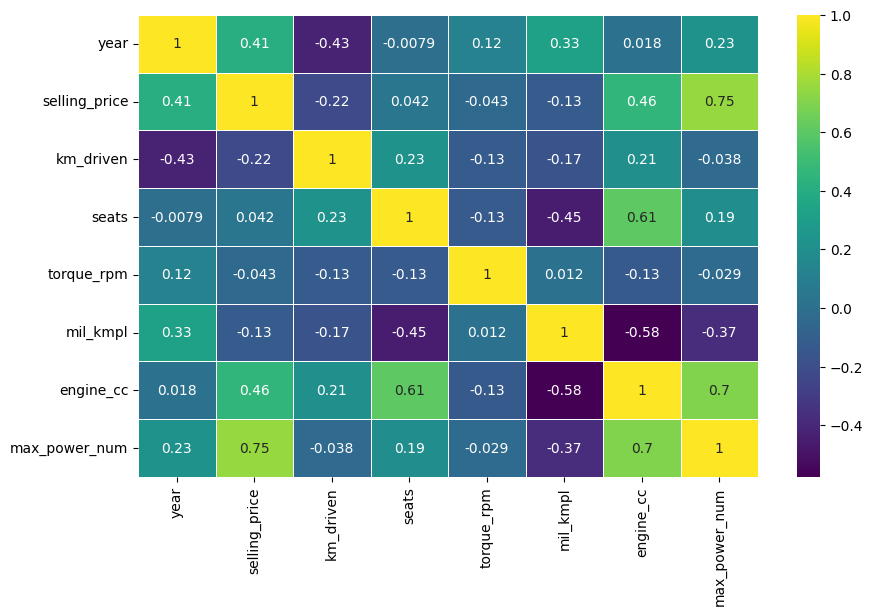

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis',linewidths=0.5)

In [28]:
# We can see there is high correlation of selling price(which we will be predicting) with max_power output of the car
# The values of correlation are pretty averaged out meaning we wont be excluding any clumn as each column is able to provide us with new
# information that is not provided by any other column.

# Pipeline the model 

In [29]:
df.sample(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_num
4006,2009,150000,40000,Petrol,Individual,Manual,First Owner,5.0,3000,19.70,796.0,46.3
2779,2017,328000,68000,Petrol,Individual,Manual,Second Owner,5.0,3500,23.84,1199.0,84.0
3066,2016,1350000,70000,Diesel,Individual,Manual,First Owner,7.0,2800,16.00,2179.0,140.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   seats          7906 non-null   float64
 8   torque_rpm     7906 non-null   int64  
 9   mil_kmpl       7906 non-null   float64
 10  engine_cc      7906 non-null   float64
 11  max_power_num  7906 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 803.0+ KB


In [31]:

df['fuel'].value_counts()

fuel
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: count, dtype: int64

In [32]:
df['seller_type'].value_counts()

seller_type
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64

In [33]:
df['transmission'].value_counts()


transmission
Manual       6865
Automatic    1041
Name: count, dtype: int64

In [34]:
df['owner'].value_counts()


owner
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64

Train test

In [35]:
x = df.drop(columns=['selling_price'])
y = np.log(df['selling_price'])
y

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 7906, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [37]:
y_train.shape

(6720,)

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


Linear regression

In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6720 entries, 2710 to 7547
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6720 non-null   int64  
 1   km_driven      6720 non-null   int64  
 2   fuel           6720 non-null   object 
 3   seller_type    6720 non-null   object 
 4   transmission   6720 non-null   object 
 5   owner          6720 non-null   object 
 6   seats          6720 non-null   float64
 7   torque_rpm     6720 non-null   int64  
 8   mil_kmpl       6720 non-null   float64
 9   engine_cc      6720 non-null   float64
 10  max_power_num  6720 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 630.0+ KB


In [42]:
# here 2,3,4,5 are categorical columns

In [43]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[2,3,4,5])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8670519163556425
MAE 0.2330352693913185


KNN

In [44]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[2,3,4,5])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6482559291595533
MAE 0.3411842013382089


Decision Tree

In [45]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[2,3,4,5])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=9)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9054618703012581
MAE 0.18102171281077895


SVM

In [46]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[2,3,4,5])
],remainder='passthrough')

step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7306942211787721
MAE 0.31873716534351565


Random forest

In [47]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[2,3,4,5])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              max_depth=15,
                              max_samples=0.5,
                              random_state=3,
                              max_features=0.75)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9375605077628006
MAE 0.14227280954442614


Meta model

In [48]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[2,3,4,5])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
svr = SVR(kernel='rbf', C=10000, epsilon=0.1)
dt = DecisionTreeRegressor(max_depth=9)
knn = KNeighborsRegressor(n_neighbors=5)
lr =LinearRegression()


step2 = VotingRegressor([('rf', rf), ('svr', svr), ('dt',dt), ('knn',knn), ('lr', lr)],weights=[3,1,2,1,2])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))

R2 score 0.918128738585961


# Exporting the model


In [49]:
import pickle

In [50]:
pickle.dump(df, open('car_data.pkl', 'wb'))
pickle.dump(pipe, open('car_model.pkl', 'wb'))